In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading cleaned movies data

In [4]:
movies = pd.read_csv('./cleanedMovies.csv')

In [5]:
# shows all rows in a window

In [6]:
pd.set_option('display.max_rows', None)

In [41]:
movies.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,year,country
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,Warner Bros.,146,1980,United States
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,Columbia Pictures,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,Lucasfilm,124,1980,United States
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,88,1980,United States
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,Orion Pictures,98,1980,United States


In [8]:
movies.columns

Index(['Unnamed: 0', 'name', 'rating', 'genre', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'budget', 'gross', 'company', 'runtime',
       'year', 'country'],
      dtype='object')

In [9]:
movies = movies.drop([movies.columns[0]], axis = 1)

In [10]:
# Correlation and Regression

In [11]:
# hypotheses

# budget and gross - high +ve correlation
# company and gross - high +ve correlation

In [12]:
# scatterplot - budget vs. gross

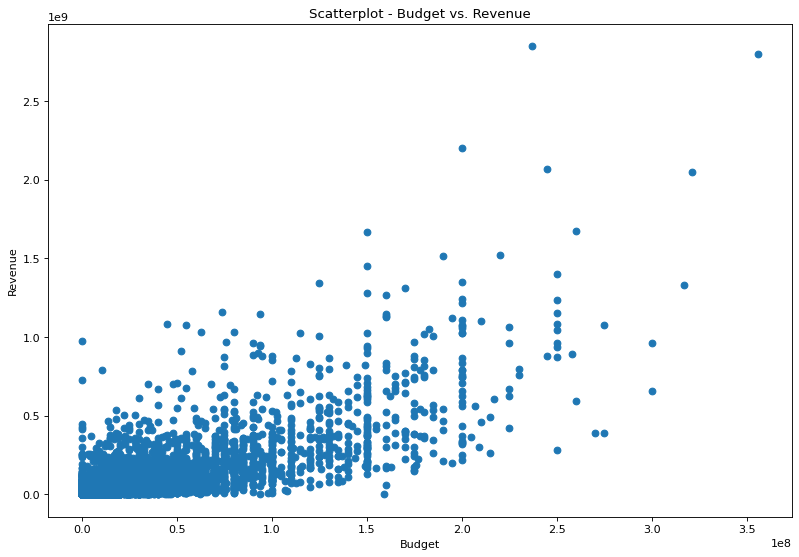

In [13]:
from matplotlib.pyplot import figure
figure(figsize = (12, 8), dpi = 80)

plt.scatter(x = movies['budget'], y = movies['gross'])

plt.title('Scatterplot - Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

In [14]:
moviesSorted = movies.sort_values(by = ['gross'], inplace = False, ascending = False)

In [15]:
moviesSorted.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,year,country
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162,2009,United States
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181,2019,United States
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox,194,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138,2015,United States
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149,2018,United States


Text(0.5, 1.0, 'Line of Best Fit')

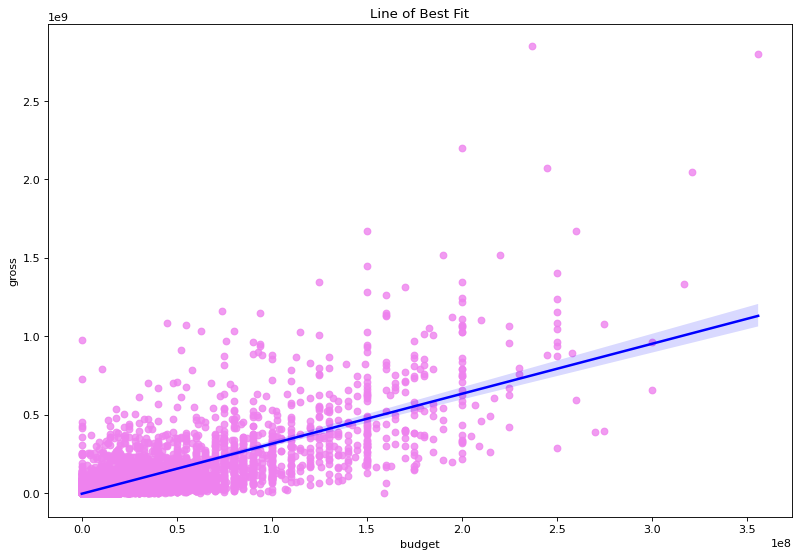

In [16]:
# Linear Regression: budget vs. gross - using seaborn

figure(figsize = (12, 8), dpi = 80)

sns.regplot(x = 'budget', y = 'gross', data = movies, scatter_kws = {'color': 'violet'}, line_kws = {'color': 'blue'})
plt.title('Line of Best Fit')

In [17]:
# correlation coefficients - using pearson method

movies.corr(method = 'pearson', numeric_only = True)

,score,votes,budget,gross,runtime,year
score,1.000000,0.409123,0.055605,0.185799,0.399543,0.106290
votes,0.409123,1.000000,0.486918,0.632376,0.309150,0.217907
budget,0.055605,0.486918,1.000000,0.749516,0.269579,0.300207
gross,0.185799,0.632376,0.749516,1.000000,0.244711,0.253495
runtime,0.399543,0.309150,0.269579,0.244711,1.000000,0.120557
year,0.106290,0.217907,0.300207,0.253495,0.120557,1.000000


In [18]:
# correlation matrix for numeric columns

In [19]:
correlation_matrix = movies.corr(method = 'pearson', numeric_only = True)

In [20]:
# heatmap for numeric columns

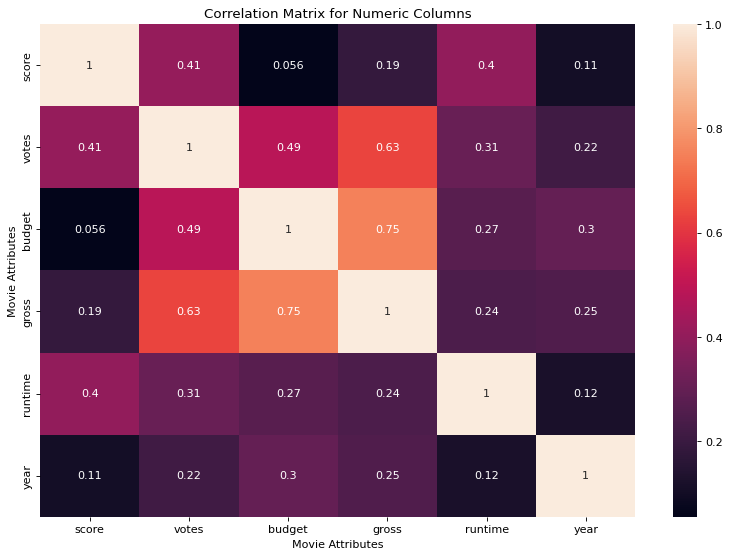

In [21]:
figure(figsize = (12, 8), dpi = 80)

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Movie Attributes');
plt.ylabel('Movie Attributes')

plt.show()

In [22]:
# movies.company.value_counts()

In [23]:
# movies.groupby(['company']).sum()['gross'].sort_values(ascending = False)

In [24]:
# analyzing non-numeric columns

In [25]:
movies_numerized = movies.copy() # deep copy

In [26]:
movies_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,year,country
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,Warner Bros.,146,1980,United States
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,Columbia Pictures,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,Lucasfilm,124,1980,United States
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,88,1980,United States
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,Orion Pictures,98,1980,United States


In [27]:
# converting non-numeric columns to numeric columns

In [28]:
for col_name in movies_numerized.columns:
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes

In [42]:
movies_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,year,country
0,6587,6,6,1705,8.4,927000,2589,4014,1047,19000000,46998772,2319,146,1980,56
1,5573,6,1,1492,5.8,65000,2269,1632,327,4500000,58853106,731,104,1980,56
2,5142,4,0,1771,8.7,1200000,1111,2567,1745,18000000,538375067,1540,124,1980,56
3,286,4,4,1492,7.7,221000,1301,2000,2246,3500000,83453539,1812,88,1980,56
4,1027,6,4,1543,7.3,108000,1054,521,410,6000000,39846344,1777,98,1980,56


In [43]:
movies.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,year,country
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,Warner Bros.,146,1980,United States
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,Columbia Pictures,104,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,Lucasfilm,124,1980,United States
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,88,1980,United States
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,Orion Pictures,98,1980,United States


In [31]:
movies_numerized.dtypes

name          int16
rating         int8
genre          int8
released      int16
score       float64
votes         int64
director      int16
writer        int16
star          int16
budget        int64
gross         int64
company       int16
runtime       int64
year          int64
country        int8
dtype: object

In [32]:
movies.dtypes

name         object
rating       object
genre        object
released     object
score       float64
votes         int64
director     object
writer       object
star         object
budget        int64
gross         int64
company      object
runtime       int64
year          int64
country      object
dtype: object

In [33]:
# correlation matrix for all columns

In [34]:
correlation_matrix = movies_numerized.corr()

In [35]:
correlation_matrix

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,year,country
name,1.000000,-0.013245,0.016355,-0.011087,0.017114,0.013045,0.009079,0.010018,0.006749,0.020548,0.006721,0.010369,0.010214,0.010379,-0.000682
rating,-0.013245,1.000000,0.136017,0.024302,0.020266,-0.002360,0.011946,-0.001875,0.000592,-0.141479,-0.131702,-0.091386,0.059303,0.036811,-0.051729
genre,0.016355,0.136017,1.000000,0.029997,0.027970,-0.145294,-0.015258,0.006746,-0.004856,-0.334021,-0.233674,-0.070013,-0.052759,-0.078120,-0.090932
released,-0.011087,0.024302,0.029997,1.000000,0.042703,0.015930,-0.001492,-0.003461,0.015550,0.008986,0.000624,-0.008443,0.001117,-0.004379,-0.046574
score,0.017114,0.020266,0.027970,0.042703,1.000000,0.409123,0.009522,0.019700,-0.001031,0.055605,0.185799,-0.004547,0.399543,0.106290,-0.094038
votes,0.013045,-0.002360,-0.145294,0.015930,0.409123,1.000000,0.000336,0.000432,-0.019341,0.486918,0.632376,0.130533,0.309150,0.217907,0.092350
director,0.009079,0.011946,-0.015258,-0.001492,0.009522,0.000336,1.000000,0.299512,0.039715,0.004976,-0.014808,0.004250,0.017583,-0.020399,0.013301
writer,0.010018,-0.001875,0.006746,-0.003461,0.019700,0.000432,0.299512,1.000000,0.028745,-0.026802,-0.023007,0.001665,-0.003751,-0.007694,-0.002998
star,0.006749,0.000592,-0.004856,0.015550,-0.001031,-0.019341,0.039715,0.028745,1.000000,-0.020164,-0.001529,0.008072,0.009208,-0.028117,-0.024893
budget,0.020548,-0.141479,-0.334021,0.008986,0.055605,0.486918,0.004976,-0.026802,-0.020164,1.000000,0.749516,0.182368,0.269579,0.300207,0.166525


In [36]:
# heatmap for all columns

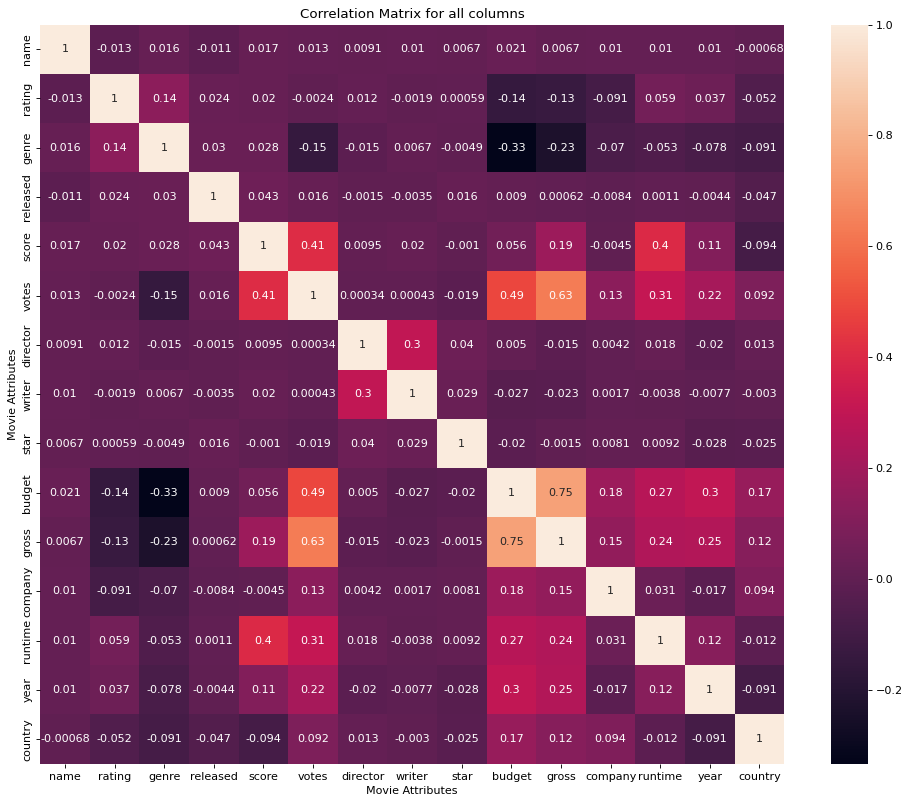

In [37]:
figure(figsize = (15, 12), dpi = 80)

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for all columns')
plt.xlabel('Movie Attributes');
plt.ylabel('Movie Attributes')

plt.show()

In [38]:
correlation_matrix['gross'].sort_values(ascending = False)

gross       1.000000
budget      0.749516
votes       0.632376
year        0.253495
runtime     0.244711
score       0.185799
company     0.153545
country     0.118039
name        0.006721
released    0.000624
star       -0.001529
director   -0.014808
writer     -0.023007
rating     -0.131702
genre      -0.233674
Name: gross, dtype: float64

In [39]:
correlation_matrix.unstack()

name      name        1.000000
          rating     -0.013245
          genre       0.016355
          released   -0.011087
          score       0.017114
          votes       0.013045
          director    0.009079
          writer      0.010018
          star        0.006749
          budget      0.020548
          gross       0.006721
          company     0.010369
          runtime     0.010214
          year        0.010379
          country    -0.000682
rating    name       -0.013245
          rating      1.000000
          genre       0.136017
          released    0.024302
          score       0.020266
          votes      -0.002360
          director    0.011946
          writer     -0.001875
          star        0.000592
          budget     -0.141479
          gross      -0.131702
          company    -0.091386
          runtime     0.059303
          year        0.036811
          country    -0.051729
genre     name        0.016355
          rating      0.136017
        

In [40]:
# Conclusion

# Budget and Gross -> high +ve correlation
# Gross and Votes -> high +ve correlation

# Company and Gross -> low +ve correlation